<a href="https://colab.research.google.com/github/markoutsikou/DWS101-ML/blob/main/ML_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

# Question 1 - Loading Dataset, Histograms and Missing Values

In [69]:
df = pd.read_csv('water_potability.csv')
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


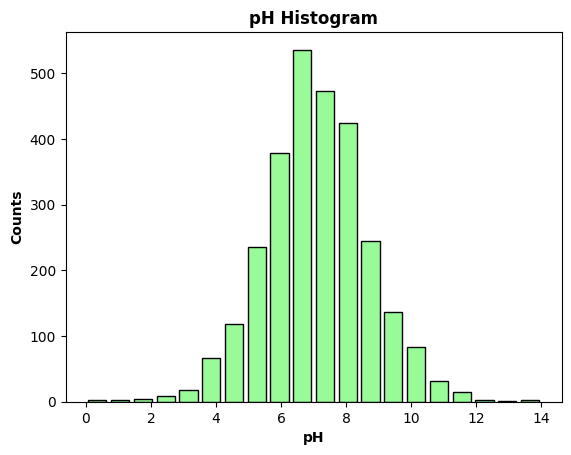

In [93]:
df['ph'].hist(bins = 20, color = 'palegreen', edgecolor = 'black', rwidth = 0.8, grid = False)
plt.title('pH Histogram', fontweight = 'bold')
plt.xlabel('pH', fontweight = 'bold')
plt.ylabel('Counts', fontweight = 'bold')
plt.show()

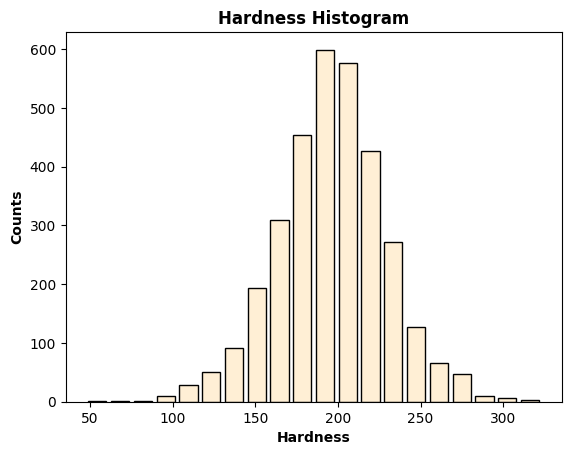

In [71]:
df['Hardness'].hist(bins = 20, color = 'papayawhip', edgecolor = 'black', rwidth = 0.8, grid = False)
plt.title('Hardness Histogram', fontweight = 'bold')
plt.xlabel('Hardness', fontweight = 'bold')
plt.ylabel('Counts', fontweight = 'bold')
plt.show()

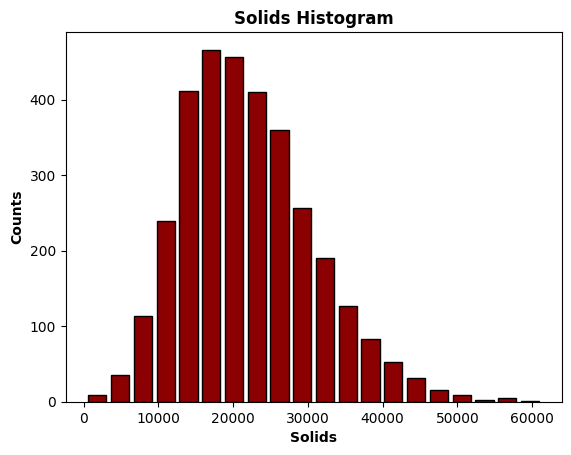

In [72]:
df['Solids'].hist(bins = 20, color = 'darkred', edgecolor = 'black', rwidth = 0.8, grid = False)
plt.title('Solids Histogram', fontweight = 'bold')
plt.xlabel('Solids', fontweight = 'bold')
plt.ylabel('Counts', fontweight = 'bold')
plt.show()

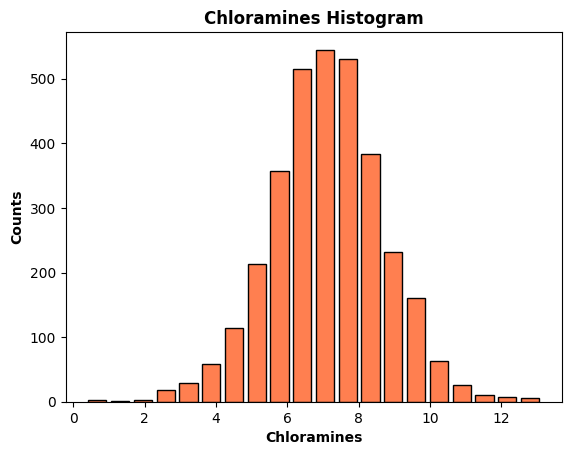

In [73]:
df['Chloramines'].hist(bins = 20, color = 'coral', edgecolor = 'black', rwidth = 0.8, grid = False)
plt.title('Chloramines Histogram', fontweight = 'bold')
plt.xlabel('Chloramines', fontweight = 'bold')
plt.ylabel('Counts', fontweight = 'bold')
plt.show()

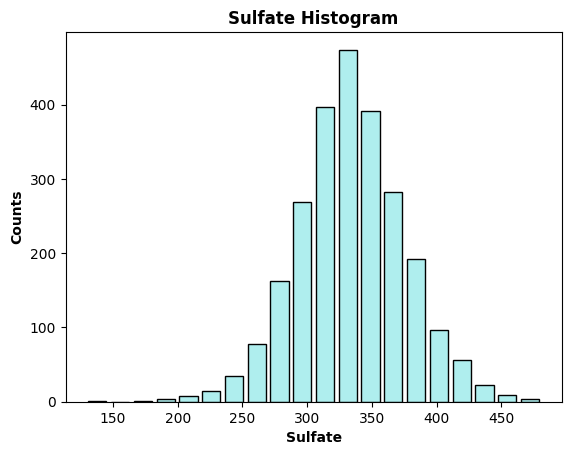

In [74]:
df['Sulfate'].hist(bins = 20, color = 'paleturquoise', edgecolor = 'black', rwidth = 0.8, grid = False)
plt.title('Sulfate Histogram', fontweight = 'bold')
plt.xlabel('Sulfate', fontweight = 'bold')
plt.ylabel('Counts', fontweight = 'bold')
plt.show()

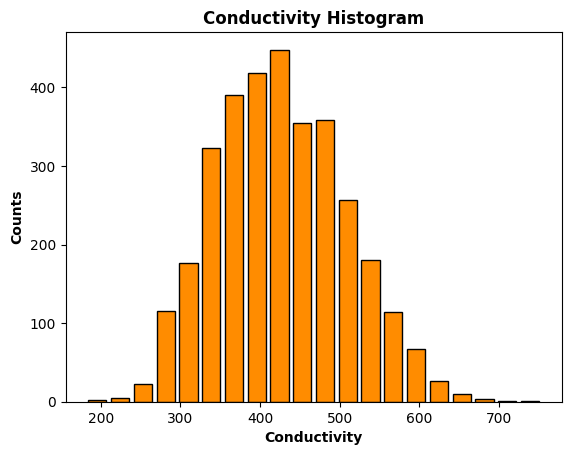

In [75]:
df['Conductivity'].hist(bins = 20, color = 'darkorange', edgecolor = 'black', rwidth = 0.8, grid = False)
plt.title('Conductivity Histogram', fontweight = 'bold')
plt.xlabel('Conductivity', fontweight = 'bold')
plt.ylabel('Counts', fontweight = 'bold')
plt.show()

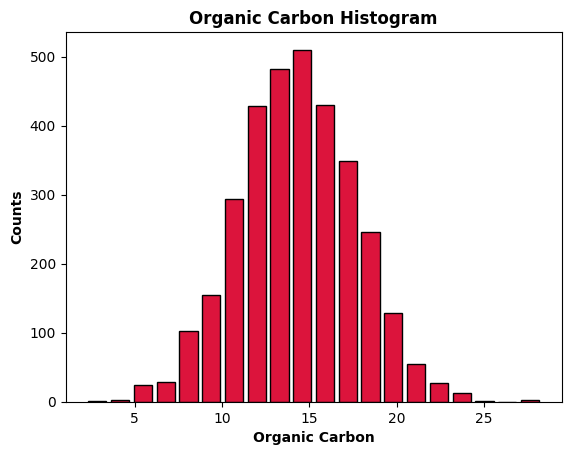

In [76]:
df['Organic_carbon'].hist(bins = 20, color = 'crimson', edgecolor = 'black', rwidth = 0.8, grid = False)
plt.title('Organic Carbon Histogram', fontweight = 'bold')
plt.xlabel('Organic Carbon', fontweight = 'bold')
plt.ylabel('Counts', fontweight = 'bold')
plt.show()

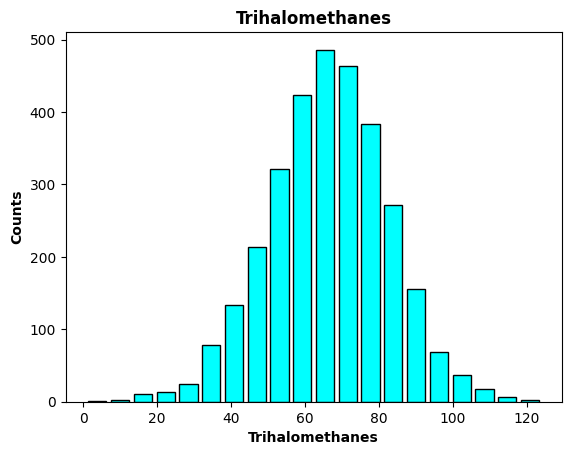

In [77]:
df['Trihalomethanes'].hist(bins = 20, color = 'cyan', edgecolor = 'black', rwidth = 0.8, grid = False)
plt.title('Trihalomethanes', fontweight = 'bold')
plt.xlabel('Trihalomethanes', fontweight = 'bold')
plt.ylabel('Counts', fontweight = 'bold')
plt.show()

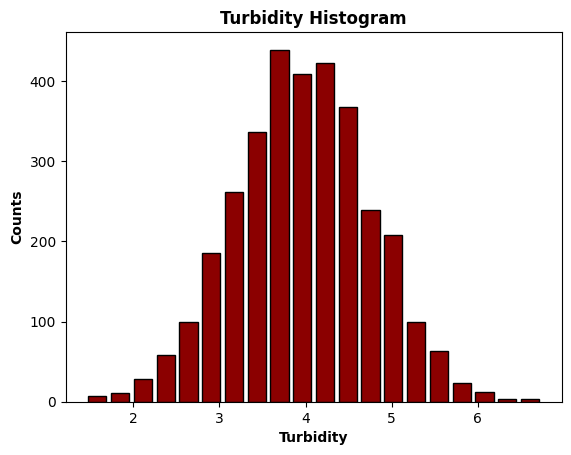

In [78]:
df['Turbidity'].hist(bins = 20, color = 'darkred', edgecolor = 'black', rwidth = 0.8, grid = False)
plt.title('Turbidity Histogram', fontweight = 'bold')
plt.xlabel('Turbidity', fontweight = 'bold')
plt.ylabel('Counts', fontweight = 'bold')
plt.show()

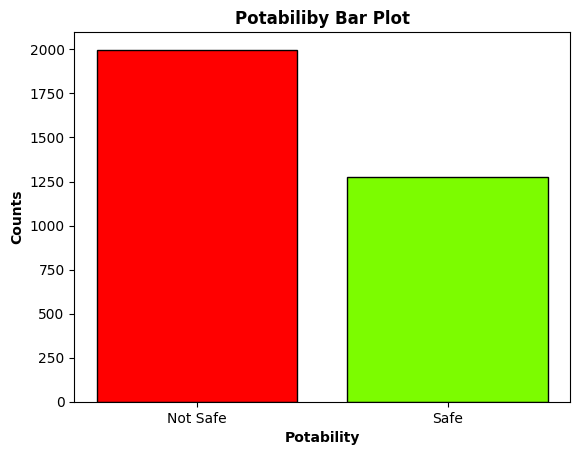

In [79]:
labels = np.array(['Not Safe', 'Safe'])
counts = df['Potability'].value_counts()
plt.bar(labels, counts, edgecolor = 'black', width=0.8, color=['red','lawngreen'])
plt.title('Potabiliby Bar Plot', fontweight = 'bold')
plt.xlabel('Potability', fontweight = 'bold')
plt.ylabel('Counts', fontweight = 'bold')
plt.show()

In [80]:
print(df.isnull().sum())

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [81]:
percentages = df['Potability'].value_counts()/len(df) * 100
print(percentages)

Potability
0    60.989011
1    39.010989
Name: count, dtype: float64


Overall, τhe quality of the dataset is not satisfactory because there are several missing values in PH, Sulfate and Trihalomethanes. Also, the dataset is unbalanced because there are more non-potable water samples and there are a few outliers.

# **QUESTION 2 - Potability Percentages According to pH**

In [82]:
ph_pot = df.dropna(subset=["ph"])

cases = {
    "pH < 6.5": ph_pot[ph_pot["ph"] < 6.5],
    "6.5 ≤ pH ≤ 8.5": ph_pot[(ph_pot["ph"] >= 6.5) & (ph_pot["ph"] <= 8.5)],
    "pH > 8.5": ph_pot[ph_pot["ph"] > 8.5]}

ph_potability_stats = {}

for label, subset in cases.items():
    counts = subset["Potability"].value_counts(normalize=True) * 100
    ph_potability_stats[label] = {
        "Sample Set": len(subset),
        "Potable (%)": counts.get(1, 0),
        "Non Potable (%)": counts.get(0, 0)
    }

pd.DataFrame(ph_potability_stats).T

,Sample Set,Potable (%),Non Potable (%)
pH < 6.5,968.0,36.776860,63.223140
6.5 ≤ pH ≤ 8.5,1328.0,43.900602,56.099398
pH > 8.5,489.0,33.128834,66.871166


The largest percentage of potable water is within the recommended Ph range. When Ph increases or decreases the possibility of the water to be potable is reduced. In conlcusion, the data partialy confirm the hypothesis, although the relationship is not absolute.

# **QUESTION 3 - Chloramine and pH Scatter Plot**

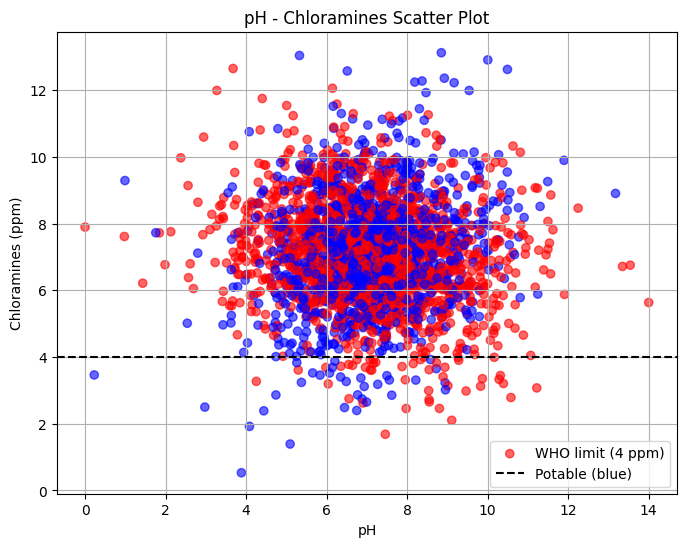

In [83]:
df_filled = df.dropna(subset=['ph'])

colors = df_filled["Potability"].map({0: "red", 1: "blue"})

plt.figure(figsize=(8, 6))
plt.scatter(df_filled["ph"], df_filled["Chloramines"], c=colors, alpha=0.6)
plt.axhline(y=4, color="black", linestyle="--", label="WHO limit (4 ppm)")
plt.title("pH - Chloramines Scatter Plot")
plt.xlabel("pH")
plt.ylabel("Chloramines (ppm)")
plt.legend(["WHO limit (4 ppm)", "Potable (blue)", "Non Potable (red)"])
plt.grid(True)
plt.show()

# **QUESTION 4 - Filling NAs**

In [84]:
df_filled = df.fillna(df.mean())

# **QUESTION 5 - Numpy Arrays**

In [85]:
X = df_filled.drop(columns=["Potability"]).values
y = df_filled["Potability"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# **QUESTION 6 - Training Decission Tree**

In [86]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

train_acc = accuracy_score(y_train, clf.predict(X_train))
test_acc = accuracy_score(y_test, clf.predict(X_test))

train_acc, test_acc

(1.0, 0.5747711088504578)

# **QUESTION 7 - Optimizing Decesion Tree**

In [87]:
criteria = ["gini", "entropy"]
max_depths = [None, 3, 5]
min_splits = [2, 5]
min_leaves = [1, 2]
max_features = [None, "sqrt"]
ccp_alphas = [0, 0.01]

optimizations = list(itertools.product(criteria, max_depths, min_splits, min_leaves, max_features, ccp_alphas))

results = []

for crit, depth, split, leaf, feat, alpha in optimizations:
    clf = DecisionTreeClassifier(
        criterion=crit,
        max_depth=depth,
        min_samples_split=split,
        min_samples_leaf=leaf,
        max_features=feat,
        ccp_alpha=alpha,
        random_state=0
    )
    clf.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, clf.predict(X_test))

    results.append([crit, depth, split, leaf, feat, alpha, train_acc, test_acc])

results_df = pd.DataFrame(results, columns=[
    "criterion", "max_depth", "min_samples_split", "min_samples_leaf",
    "max_features", "ccp_alpha", "train_acc", "test_acc"
])

results_df.sort_values(by="test_acc", ascending=False).head(10)

,criterion,max_depth,min_samples_split,min_samples_leaf,max_features,ccp_alpha,train_acc,test_acc
92,entropy,5.0,5,2,None,0.0,0.671173,0.655137
84,entropy,5.0,2,2,None,0.0,0.671173,0.655137
80,entropy,5.0,2,1,None,0.0,0.671609,0.654120
88,entropy,5.0,5,1,None,0.0,0.671609,0.654120
36,gini,5.0,2,2,None,0.0,0.662015,0.643947
44,gini,5.0,5,2,None,0.0,0.662015,0.642930
32,gini,5.0,2,1,None,0.0,0.662887,0.641913
40,gini,5.0,5,1,None,0.0,0.662015,0.641913
64,entropy,3.0,2,1,None,0.0,0.641082,0.639878
68,entropy,3.0,2,2,None,0.0,0.641082,0.639878


# **QUESTION 8 - Retraining Decision Tree with best accuracy and max-depth = 3**

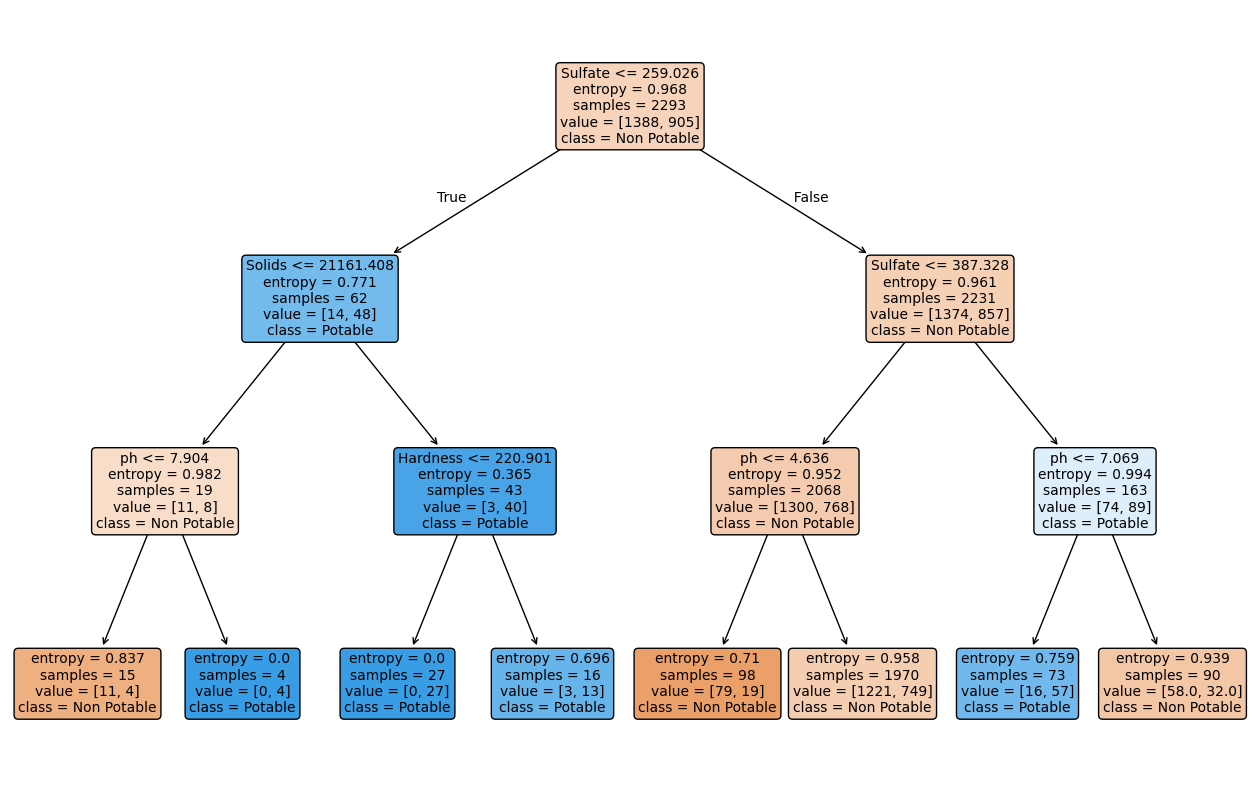

In [91]:
clf_best = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features=None,
    ccp_alpha=0.0,
    random_state=0
)
clf_best.fit(X_train, y_train)

plt.figure(figsize=(16, 10))
plot_tree(
    clf_best,
    feature_names=df_filled.drop(columns=["Potability"]).columns,
    class_names=["Non Potable", "Potable"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()

# **QUESTION 9 - Retraining Decision Tree with best accuracy**

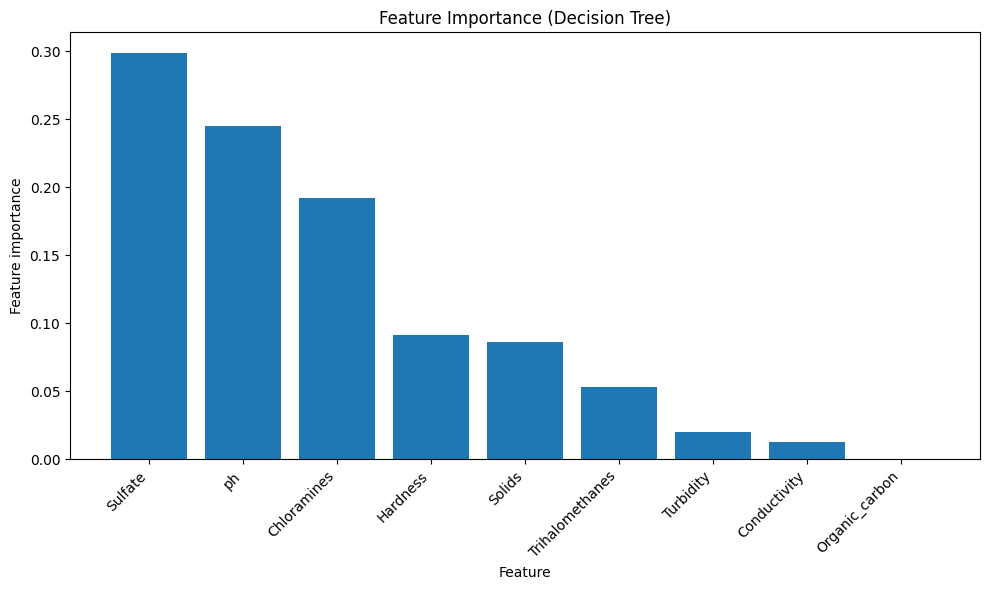

In [89]:
X = df_filled.drop(columns=["Potability"])
y = df_filled["Potability"].values

X_train, X_test, y_train, y_test = train_test_split(
    X.values, y, test_size=0.3, random_state=0
)

criteria = ["gini", "entropy"]
max_depths = [None, 3, 5]
min_splits = [2, 5]
min_leaves = [1, 2]
max_features = [None, "sqrt"]
ccp_alphas = [0, 0.01]

rows = []
best = {"test_acc": -1}

for crit, depth, split, leaf, feat, alpha in itertools.product(
    criteria, max_depths, min_splits, min_leaves, max_features, ccp_alphas
):
    clf = DecisionTreeClassifier(
        criterion=crit,
        max_depth=depth,
        min_samples_split=split,
        min_samples_leaf=leaf,
        max_features=feat,
        ccp_alpha=alpha,
        random_state=0
    )
    clf.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, clf.predict(X_test))

    rows.append([crit, depth, split, leaf, feat, alpha, train_acc, test_acc])


    if test_acc > best["test_acc"]:
        best = {
            "params": {
                "criterion": crit,
                "max_depth": depth,
                "min_samples_split": split,
                "min_samples_leaf": leaf,
                "max_features": feat,
                "ccp_alpha": alpha
            },
            "train_acc": train_acc,
            "test_acc": test_acc
        }

results_df = pd.DataFrame(
    rows,
    columns=[
        "criterion", "max_depth", "min_samples_split", "min_samples_leaf",
        "max_features", "ccp_alpha", "train_acc", "test_acc"
    ]
)

best_params = best["params"]
best_clf = DecisionTreeClassifier(random_state=0, **best_params)
best_clf.fit(X_train, y_train)

importances = best_clf.feature_importances_
feat_df = pd.DataFrame({
    "feature": X.columns,
    "importance": importances
}).sort_values("importance", ascending=False).reset_index(drop=True)

plt.figure(figsize=(10, 6))
plt.bar(feat_df["feature"], feat_df["importance"])
plt.xticks(rotation=45, ha="right")
plt.title("Feature Importance (Decision Tree)")
plt.ylabel("Feature importance")
plt.xlabel("Feature")
plt.tight_layout()
plt.show()

As we can see, if the device could make only 5 analyses, the 5 features worth extracting are: Sulfate, pH, Chloramines, Hardness, Solids.
That is because, those 5 features explain ~91% of the total significance of the model (sum ~0.913), so they convey almost all the information used by the tree to distinguish potable/non-potable.

# **QUESTION 10 - Random Forest**

A Random Forest usually performs better than a single Decision Tree because:

* It reduces overfitting — by averaging many trees trained on random samples, the model generalizes better and doesn’t memorize the training data.
* It lowers variance — individual trees can be very sensitive to small changes in the data, but a forest smooths out these variations.  
* It uses feature randomness — at each split, only a random subset of features is considered, which prevents one dominant feature from biasing all trees.
* It’s more stable and robust — the ensemble of many trees makes predictions less affected by noise or outliers.










# **QUESTION 11 - Random Forest Training**

In [94]:
df_filled = df.fillna(df.mean(numeric_only=True))

X = df_filled.drop(columns=["Potability"])
y = df_filled["Potability"].values

X_train, X_test, y_train, y_test = train_test_split(
    X.values, y, test_size=0.3, random_state=0
)

criteria = ["gini", "entropy"]
max_depths = [None, 3, 5]
min_splits = [2, 5]
min_leaves = [1, 2]
max_features = [None, "sqrt"]
n_estimators_list = [50, 100, 200]

rows = []
best = {"test_acc": -1}

for crit, depth, split, leaf, feat, n_est in itertools.product(
    criteria, max_depths, min_splits, min_leaves, max_features, n_estimators_list
):
    rf = RandomForestClassifier(
        criterion=crit,
        max_depth=depth,
        min_samples_split=split,
        min_samples_leaf=leaf,
        max_features=feat,
        n_estimators=n_est,
        random_state=0,
        n_jobs=-1
    )
    rf.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, rf.predict(X_train))
    test_acc = accuracy_score(y_test, rf.predict(X_test))

    rows.append([crit, depth, split, leaf, feat, n_est, train_acc, test_acc])

    if test_acc > best["test_acc"]:
        best = {
            "params": {
                "criterion": crit,
                "max_depth": depth,
                "min_samples_split": split,
                "min_samples_leaf": leaf,
                "max_features": feat,
                "n_estimators": n_est
            },
            "train_acc": train_acc,
            "test_acc": test_acc
        }

results_df = pd.DataFrame(
    rows,
    columns=[
        "criterion", "max_depth", "min_samples_split",
        "min_samples_leaf", "max_features", "n_estimators",
        "train_acc", "test_acc"
    ]
)

best_params = best["params"]
best_rf = RandomForestClassifier(random_state=0, **best_params)
best_rf.fit(X_train, y_train)

importances = best_rf.feature_importances_
feat_df = pd.DataFrame({
    "feature": X.columns,
    "importance": importances
}).sort_values("importance", ascending=False).reset_index(drop=True)

print("\nFeature Importances:")
print(feat_df)


Feature Importances:
           feature  importance
0          Sulfate    0.128689
1               ph    0.128105
2         Hardness    0.124075
3      Chloramines    0.114937
4           Solids    0.113980
5     Conductivity    0.098956
6   Organic_carbon    0.097539
7        Turbidity    0.096875
8  Trihalomethanes    0.096843


# **QUESTION 12**

The model is more important to focus on detecting accurantly non-potable water,
even if this reduces overall accuracy or increases missed detections of potable water because human safety is always the priority.

# **QUESTION 13**

From legal point, using the best Random Forest model is safer.
It provides stronger evidence of reliability, minimizes harmful misclassifications, and shows that the company acted responsibly to protect public health.